In [1]:
from matplotlib import pyplot as plt
from PIL import Image as PILImage
from matplotlib.widgets import Button
import json
# import numpy as np

%matplotlib widget

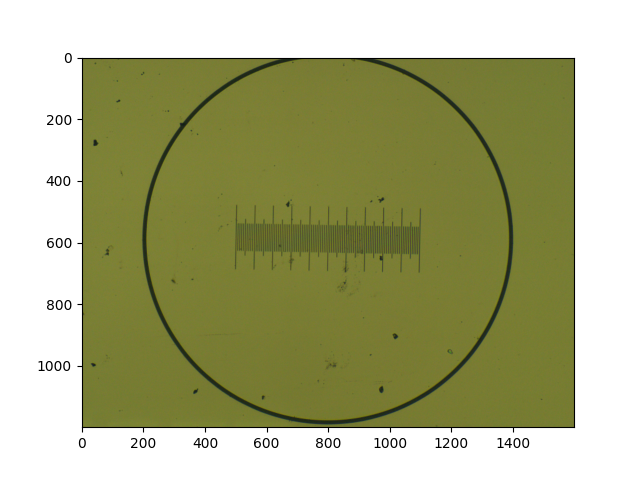

x: 461.83766233766244 and y: 682.6168831168832
x: 981.318181818182 and y: 692.3571428571429
x: 857.9415584415585 and y: 744.3051948051949


In [2]:
fig = plt.figure()
plt.imshow(PILImage.open(r"..\..\example\data\set_a\a_5x_scale_1mm.bmp"))

def mouse_event(event):
    print('x: {} and y: {}'.format(event.xdata, event.ydata))


cid = fig.canvas.mpl_connect('button_press_event', mouse_event)

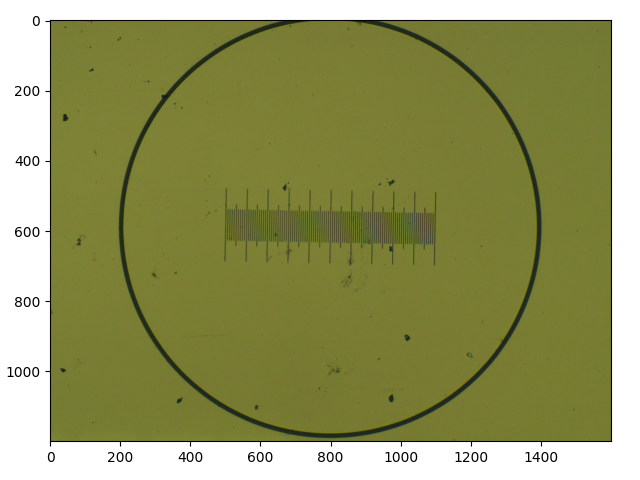

In [3]:
# largely built on the InteractiveManualRelation class
class CalibrationManual():
    """Allows user to manually specify calibration using interactive matplotlib."""
    def __init__(self,calibration_image_path=None):
        self.distances={"pixel":None,"length":None,"length_unit":None}
        if calibration_image_path is not None:
            self._fig=plt.figure()
            self._ax=self._fig.subplots()
            self._fig.canvas.toolbar_visible = False
            self._fig.canvas.header_visible = False
            self._fig.canvas.footer_visible = False
            self._fig.tight_layout()
            self._calibration_image=PILImage.open(calibration_image_path)
            self._ax.imshow(self._calibration_image)
            plt.show()

    def calibrate_pixels(self):
        """Start collecting user input for calibrating pixels"""
        self._click_button=Button(self._ax,label="")
        self._click_button_event=self._click_button.on_clicked(self._calibrate_pixels_callback)
        self._clicked_pts=[]
        pass
    def _calibrate_pixels_callback(self,event):
        if (int(event.button))==1: #left click
            # print(event.xdata,event.ydata)
            self._ax.plot([event.xdata],[event.ydata],"1r")
            self._clicked_pts.append((event.xdata,event.ydata))
    def calibrate_pixels_resolve(self):
        """Resolves user input into average distance between all pairs of points"""
        self._click_button.disconnect(self._click_button_event)
        for pt in self._ax.lines:
            if pt.get_marker()=="1":
                pt.remove()
        points_a=self._clicked_pts[::2]
        points_b=self._clicked_pts[1::2]
        pixel_distances=[]
        for (ax,ay),(bx,by) in zip(points_a,points_b):
            plt.plot([ax,bx],[ay,by],".--")
            pixel_distance=((ax-bx)**2+(ay-by)**2)**0.5
            pixel_distances.append(pixel_distance)
            print(f"Pixel Distance:{pixel_distance:.2F}")
        pixel_distances_average=sum(pixel_distances)/len(pixel_distances)
        print(f"Average Pixel Distance: {pixel_distances_average:.2F}")
        self.distances["pixel"]=pixel_distances_average

    def calibrate_measurement(self,length,units):
        """Set known distance for the pixel measurement"""
        self.distances["length"]=length
        self.distances["length_unit"]=units

    def print_pixels_per_length(self):
        """Prints scale in terms of pixel per length"""
        print(f"Pixels: {self.distances['pixel']:.2F}")
        print(f"Length: {self.distances['length']} {self.distances['length_unit']}")
        print(f"Pixels/Length = {self.distances['pixel']/self.distances['length']:.2f} pixels/{self.distances['length_unit']}")
    def print_length_per_pixel(self):
        """Prints scale in terms of length per pixel"""
        print(f"Pixels: {self.distances['pixel']:.2F}")
        print(f"Length: {self.distances['length']} {self.distances['length_unit']}")
        print(f"length/pixel = {self.distances['length']/self.distances['pixel']:.4g} {self.distances['length_unit']}/pixels")
    def save_calibration(self,miscal_filepath):
        "Saves calibration as JSON in `.miscal` file"
        json_object=json.dumps(self.distances,indent=4)
        with open(miscal_filepath,"w") as outfile:
            outfile.write(json_object)
    def load_calibration(self,miscal_filepath):
        "Loads calibration from JSON in `.miscal` file"
        with open(miscal_filepath) as infile:
            miscal = json.load(infile)
        self.distances=miscal
        


cm=CalibrationManual(r"..\..\example\data\set_a\a_5x_scale_1mm.bmp")
cm.calibrate_pixels()


In [4]:
cm.calibrate_pixels_resolve()

Pixel Distance:601.91
Pixel Distance:604.70
Average Pixel Distance: 603.31


In [5]:
cm.calibrate_measurement(1,"mm")

In [6]:
cm.print_pixels_per_length()
cm.print_length_per_pixel()

Pixels: 603.31
Length: 1 mm
Pixels/Length = 603.31 pixels/mm
Pixels: 603.31
Length: 1 mm
length/pixel = 0.001658 mm/pixels


In [7]:
cm.save_calibration("a_5x.miscal")

In [10]:
cm2=CalibrationManual()
cm2.load_calibration("a_5x.miscal")
cm2.print_pixels_per_length()
cm2.print_length_per_pixel()
print(cm2.distances)

Pixels: 603.31
Length: 1 mm
Pixels/Length = 603.31 pixels/mm
Pixels: 603.31
Length: 1 mm
length/pixel = 0.001658 mm/pixels
{'pixel': 603.3070017874088, 'length': 1, 'length_unit': 'mm'}


# Testing Module

In [ ]:
from calibrate import CalibrationManual